# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [19]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [20]:
# Reading the pickle file of data set

df = pd.read_pickle("~/Downloads/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
## Exploratory Data Analysis
***

### Separating the Date, Time, Day of crashes

In [39]:
# Convert 'DateTimeColumn' to datetime format if it's not already
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Split the 'DateTimeColumn' into separate 'Date', 'Day', and 'Time' columns
df['Date of Crash'] = df['CRASH DATE_CRASH TIME'].dt.date
df['Day of Crash'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%A')
df['Time of Crash'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%H:%M:%S')

df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date of Crash,Day of Crash,Time of Crash,Hour,TimeSlot
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Sedan,Sedan,NaN,NaN,NaN,2021-09-11,Saturday,02:39:00,2,Night_Hour
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,Sedan,NaN,NaN,NaN,NaN,2022-03-26,Saturday,11:45:00,11,Pre-Noon
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29,Wednesday,06:55:00,6,Pre-Noon
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,Sedan,NaN,NaN,NaN,NaN,2021-09-11,Saturday,09:35:00,9,Pre-Noon
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2021-12-14,Tuesday,08:13:00,8,Pre-Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Sedan,Sedan,NaN,NaN,NaN,2023-07-03,Monday,18:05:00,18,Evening_Hour
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,Sedan,NaN,NaN,NaN,NaN,2023-07-22,Saturday,21:39:00,21,Night_Hour
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,Taxi,NaN,NaN,NaN,NaN,2023-07-02,Sunday,17:55:00,17,Evening_Hour
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,2023-07-22,Saturday,13:15:00,13,Post_Noon


In [61]:
df.shape

(2018245, 35)

### Visualizing the number of accidents for each day of the week

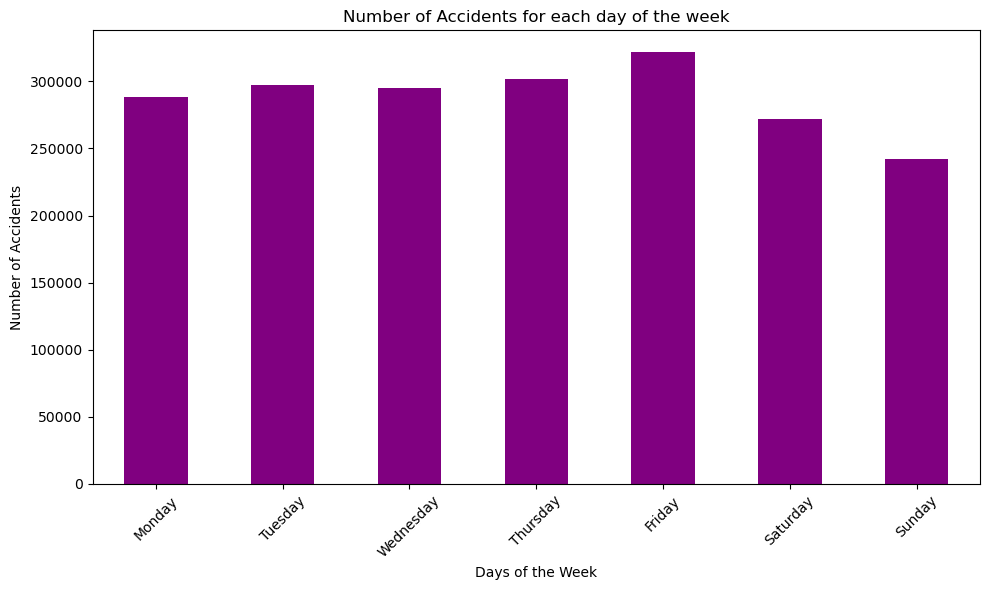

In [58]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'Day' and count the number of occurrences
accidents_by_day = df['Day of Crash'].value_counts().sort_index()

# Reorder the index based on the specified day_order
accidents_by_day = accidents_by_day.reindex(day_order, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='purple')
plt.title('Number of Accidents for each day of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

### Time of the day when maximum crashes occured

In [41]:
# Convert the 'Time of Crash' column to a datetime format
df['Time of Crash'] = pd.to_datetime(df['Time of Crash'], format='%H:%M:%S').dt.time

# Extract the hour from the 'Time of Crash' column
df['Hour'] = df['Time of Crash'].apply(lambda x: x.hour)

# Group the data by 'Hour' and count the number of accidents for each hour
hourly_accidents = df['Hour'].value_counts().sort_index()

# Find the hour with the highest number of accidents
max_hourly_accidents = hourly_accidents.idxmax()

# Print the hour with the most accidents and its count
print(f"The hour with the most accidents is {max_hourly_accidents} o'clock with {hourly_accidents[max_hourly_accidents]} accidents.")

The hour with the most accidents is 16 o'clock with 145924 accidents.


### Day and Quarter of the day when maximum crashes have occured

In [42]:
# Create a function to categorize time into slots
def categorize_time(time):
    if 5 <= time.hour < 12:
        return "Pre-Noon"
    elif 12 <= time.hour < 17:
        return "Post_Noon"
    elif 17 <= time.hour < 21:
        return "Evening_Hour"
    else:
        return "Night_Hour"

# Create new columns for time slot and day of the week
df['TimeSlot'] = df['Time of Crash'].apply(categorize_time)

# Group the data by day of the week and time slot, and count accidents in each group
accident_counts = df.groupby(['Day of Crash', 'TimeSlot']).size().reset_index(name='AccidentCount')

# Find the time slot and day of the week with the most accidents
most_accidents = accident_counts.loc[accident_counts['AccidentCount'].idxmax()]

print("Day with the most accidents:", most_accidents['Day of Crash'])
print("Time slot with the most accidents:", most_accidents['TimeSlot'])
print("Number of accidents:", most_accidents['AccidentCount'])

Day with the most accidents: Friday
Time slot with the most accidents: Post_Noon
Number of accidents: 101917


### Visualizing the number of crashes for each quarter of the day on each day of the week

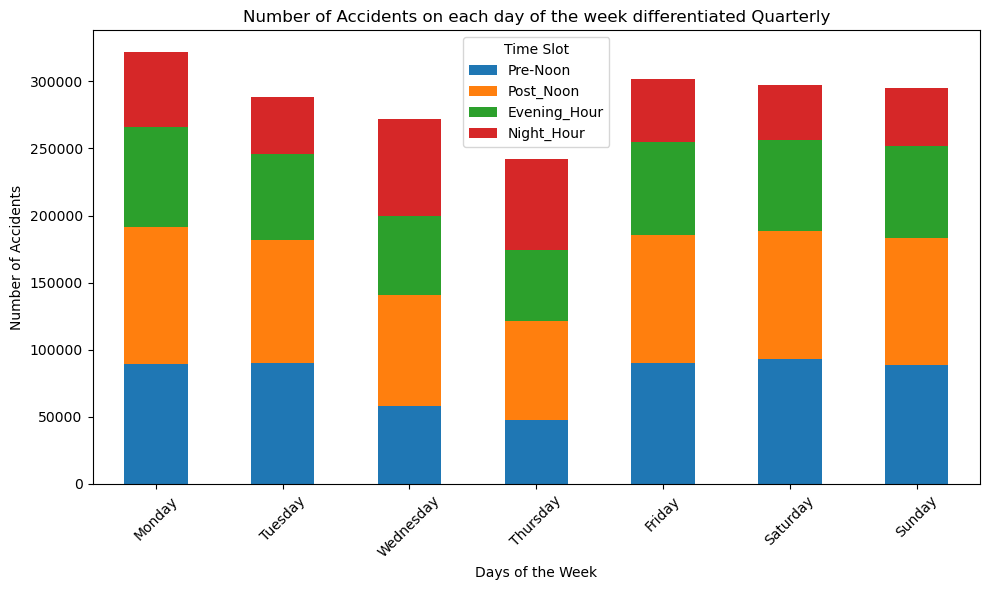

In [43]:
# Group by 'DayOfWeek' and 'TimeSlot' and count the accidents
grouped = df.groupby(['Day of Crash', 'TimeSlot']).size().unstack(fill_value=0)

# Reorder columns to have them in a logical order
column_order = ['Pre-Noon', 'Post_Noon', 'Evening_Hour', 'Night_Hour']
grouped = grouped[column_order]

# Create a bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents on each day of the week differentiated Quarterly')

# Customize the x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45)

# Show the legend
plt.legend(title='Time Slot')

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
# Group the data by 'Borough Key' and 'Zip Code Key', and count accidents in each group
zip_code_count_for_borough = df.groupby(['BOROUGH', 'ZIP CODE']).size().reset_index(name='AccidentCount')

# Find the zip code with the most accidents in each borough
max_crashes_per_borough = zip_code_count_for_borough.groupby('BOROUGH').apply(lambda x: x.loc[x['AccidentCount'].idxmax()])

# Print the result for each borough
for _, row in max_crashes_per_borough.iterrows():
    borough = row['BOROUGH']
    zip_code = row['ZIP CODE']
    accident_count = row['AccidentCount']
    print(f"Borough: {borough}, Maximum accidents occur in {zip_code} Zip code, Number of Accidents: {accident_count}")

Borough: BRONX, Maximum accidents occur in 10467.0 Zip code, Number of Accidents: 10022
Borough: BROOKLYN, Maximum accidents occur in 11207.0 Zip code, Number of Accidents: 19792
Borough: MANHATTAN, Maximum accidents occur in 10019.0 Zip code, Number of Accidents: 11288
Borough: QUEENS, Maximum accidents occur in 11385.0 Zip code, Number of Accidents: 12905
Borough: STATEN ISLAND, Maximum accidents occur in 10306.0 Zip code, Number of Accidents: 6490


### Visualizing the number of Injured and Killed people in crashes for each Borough

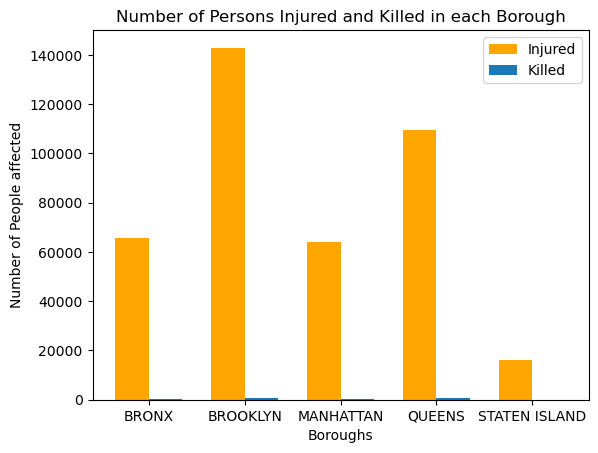

In [60]:
# Group the data by 'BOROUGH'
borough_grouping = df.groupby('BOROUGH').sum()

# Get the distinct borough names
boroughs = borough_grouping.index

# Get the number of bars (categories)
num_of_boroughs = len(boroughs)

# Define the width of each bar
bar_width = 0.35

# Create an index for the x-axis
x = range(num_of_boroughs)

# Create the bar graph
plt.bar(x, borough_grouping['NUMBER OF PERSONS INJURED'], width=bar_width, label='Injured', color = 'orange')
plt.bar([i + bar_width for i in x], borough_grouping['NUMBER OF PERSONS KILLED'], width=bar_width, label='Killed')

# Set the x-axis labels
plt.xticks([i + bar_width / 2 for i in x], boroughs)

# Set labels and title
plt.xlabel('Boroughs')
plt.ylabel('Number of People affected')
plt.title('Number of Persons Injured and Killed in each Borough')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Visualizing Pesdestrians, Cyclists and Motorists Injured and Killed in crashes for each Borough

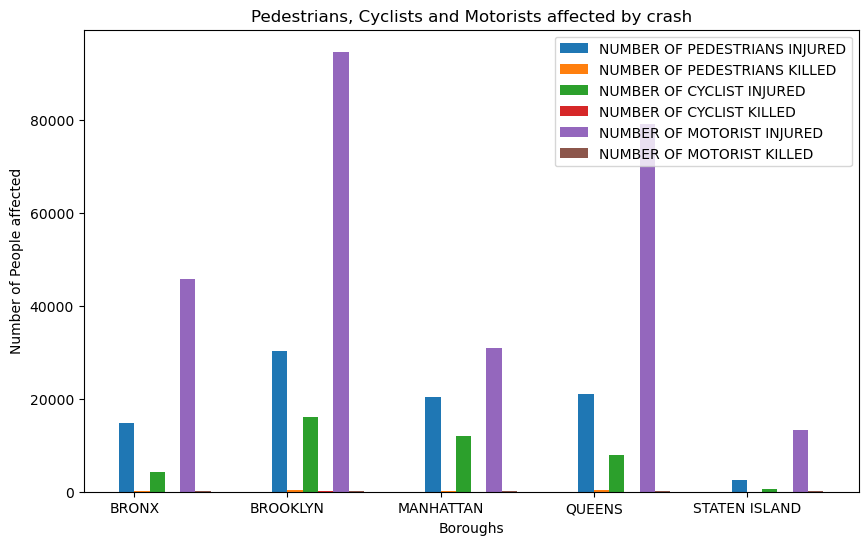

In [46]:
# Define the columns you want to include in the borough_groups_bars bar chart
name_of_bars = [
    'NUMBER OF PEDESTRIANS INJURED', 
    'NUMBER OF PEDESTRIANS KILLED', 
    'NUMBER OF CYCLIST INJURED', 
    'NUMBER OF CYCLIST KILLED', 
    'NUMBER OF MOTORIST INJURED', 
    'NUMBER OF MOTORIST KILLED']

# Group the data by 'BOROUGH' and calculate the sum for selected columns
borough_groups_bars = df.groupby("BOROUGH")[name_of_bars].sum()

# Transpose the DataFrame for plotting
borough_groups_bars = borough_groups_bars.transpose()

# Create a list of boroughs
boroughs = borough_groups_bars.columns

# Define the x-axis positions for each group
x = np.arange(len(boroughs))

# Define the width of each bar
width = 0.1

# Create the borough_groups_bars bar chart
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(name_of_bars)):
    ax.bar(x + (i * width), borough_groups_bars.iloc[i], width, label=name_of_bars[i])

# Set labels, title, and legend
ax.set_xlabel("Boroughs")
ax.set_ylabel("Number of People affected")
ax.set_title("Pedestrians, Cyclists and Motorists affected by crash")
ax.set_xticks(x + width / 2)
ax.set_xticklabels(boroughs)
ax.legend()

plt.show()

## Answering Important Questions about the Vehicle crashes in NYC

### Which Borough has seen the highest number of crashes since 2012?

In [47]:
# Convert the 'CRASH DATE' column to a datetime object
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Filter the data to include only records since 2012
df_since_2012 = df[df['CRASH DATE_CRASH TIME'] >= '2012-01-01']

# Group the data by borough and count the number of crashes in each borough
borough_crash_counts = df_since_2012['BOROUGH'].value_counts()

# Find the borough with the highest total number of crashes
max_crashes_borough = borough_crash_counts.idxmax()

print(f"The borough with the highest total number of crashes reported since 2012 is {max_crashes_borough}.")

The borough with the highest total number of crashes reported since 2012 is BROOKLYN.


### Which Borough has the maximum number of crashes for every 100,000 people?

In [49]:
# Population data
population_data = {
    'Bronx': 1446788,
    'Brooklyn': 2648452,
    'Manhattan': 1638281,
    'Queens': 2330295,
    'Staten Island': 487155
}

# Filter the data frame to include only rows from July 2012 onwards
df['Date'] = pd.to_datetime(df['Date of Crash'])  # Convert DATE column to datetime
start_date = pd.to_datetime('2012-07-01')
filtered_crash_data = df[df['Date'] >= start_date]

# Calculate the total number of crashes for each borough in the filtered data
crashes_by_borough = filtered_crash_data['BOROUGH'].value_counts().to_dict()

# Calculate crashes per 100,000 people for each borough
crashes_per_100k = {}
for borough, crashes in crashes_by_borough.items():
    population = population_data.get(borough.capitalize())  # Get population for the borough
    if population is not None:
        crashes_per_100k[borough] = (crashes / population) * 100000

# Find the borough with the most crashes per 100,000 people
most_crashes_borough = max(crashes_per_100k, key=crashes_per_100k.get)

print(f"The borough with the most crashes per 100,000 people is {most_crashes_borough} with {crashes_per_100k[most_crashes_borough]:.2f} crashes per 100,000 people.")

The borough with the most crashes per 100,000 people is MANHATTAN with 19121.63 crashes per 100,000 people.


### What is the cause of the maximum crashes?

In [50]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
filtered_data = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Calculate the total number of accidents for each contributing factor
contributing_factor_counts = filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Find the leading cause of crashes (excluding 'Unspecified')
leading_cause = contributing_factor_counts.idxmax()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(filtered_data)
proportion = contributing_factor_counts[leading_cause] / total_accidents

print(f"The leading cause of crashes (excluding 'Unspecified') is '{leading_cause}'")
print(f"The proportion of accidents attributable to this cause is {proportion:.2%}")

The leading cause of crashes (excluding 'Unspecified') is 'Driver Inattention/Distraction'
The proportion of accidents attributable to this cause is 30.27%


### What are the top three causes of the crashses?

In [51]:
# Exclude the 'Unspecified' factor from the counts
top_factors = contributing_factor_counts.index[0:3]  # Get the top 3 factors (excluding 'Unspecified')

# Calculate the proportion of total accidents accounted for by the top 3 causes
total_accidents = len(filtered_data)
proportion = contributing_factor_counts[top_factors].sum() / total_accidents

print(f"The top 3 causes of crashes (excluding 'Unspecified') account for {proportion:.2%} of total crashes.")

The top 3 causes of crashes (excluding 'Unspecified') account for 47.37% of total crashes.


### How many crashes had atleast one fatality?

In [52]:
# Filter the dataset to include only accidents with at least one fatality
fatal_accidents = df_since_2012[df_since_2012['NUMBER OF PERSONS KILLED'] >= 1]

# Calculate the total count of accidents with at least one fatality
total_fatal_accidents = len(fatal_accidents)

print(f"The total count of accidents that involved at least one fatality since 2012 is {total_fatal_accidents}.")

The total count of accidents that involved at least one fatality since 2012 is 2804.


### How many fatalities are recorded for every 1000 crashes?

In [53]:
# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the total number of accidents with at least one fatality
fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] > 0]
total_fatal_accidents = len(fatal_accidents)

# Calculate the average number of fatal accidents for every 1000 accidents
average_fatal_accidents_per_1000 = (total_fatal_accidents / total_accidents) * 1000

print(f"On average, for every 1000 accidents, {average_fatal_accidents_per_1000:.3f} have resulted in at least one person dead.")

On average, for every 1000 accidents, 1.389 have resulted in at least one person dead.



### What percentage of crashes in the data have not recorded a Borough code?

In [54]:
# Calculate the number of accidents without a Borough code
accidents_without_borough_code = df['BOROUGH'].isna().sum()

# Calculate the proportion of accidents without a Borough code
proportion_without_borough = accidents_without_borough_code / total_accidents

print(f"The proportion of accidents in the data without a Borough code is {proportion_without_borough:.1%}.")

The proportion of accidents in the data without a Borough code is 31.1%.


### What vehicle type combinations have been involved in maximum crashes?

In [55]:
# Combine 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' into a single column for analysis
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + ' + ' + df['VEHICLE TYPE CODE 2']

# Calculate the most common combination of vehicles involved in accidents
most_common_combination = df['Vehicle Combination'].mode().iloc[0]

# Calculate the number of accidents involving the most common combination
num_accidents_with_most_common_combination = len(df[df['Vehicle Combination'] == most_common_combination])

print(f"The combination of vehicles with the most number of accidents is: {most_common_combination}")
print(f"The number of accidents involving this combination is: {num_accidents_with_most_common_combination}")

The combination of vehicles with the most number of accidents is: Sedan + Sedan
The number of accidents involving this combination is: 197944


## Insights from Analysis

##### 1. Most crashes happened on Friday probably because it is the start of the weekend and there is more rush on the roads and least accidents happened on Sunday.
##### 2. Maximum Accidents happened Post noon so we could try to reduce this by increasing the number of traffic police during these hours to maintain the traffic rules.
##### 3. Another step would be to check all traffic lights and signals in zip codes which have recorded the maximum crashes.
##### 4. Motorists are the most likely to get injured so the safety rules about the gears worn by motorists should be reviewed. So should the maximum speeding limit.
##### 5. Brooklyn has the maximum number of accidents so road conditions, construction and wear and tear should be inspected.
##### The highest cause of crashes is Driver Inattention this could be because of sleep deprovation, using electronic devices while driving or intoxication. Rules regarding these should be reviewed and study of measures to be taken should be conducted.
##### 6. Fatality for the number of crashes is 0.14% which is quite low showing that very few of these accidents had extreme impact.